In [54]:
%load_ext autoreload
%autoreload 2

from math import sqrt, pi
import numpy as np
import jax
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
from tqdm.auto import trange

from diffbank.utils import get_n_templates

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
key = random.PRNGKey(487)
m_min, m_max = jnp.array(0.0), jnp.array(5.0)
naive_vol = (m_max - m_min) ** 2

# Euclidean metric
density_fun = lambda _: jnp.array(1.0)

# Uniform sampler
sampler = lambda key, n: random.uniform(key, (n, 2), minval=m_min, maxval=m_max)


@jax.jit
def get_eff(x, y):
    """
    Euclidean distance.
    """
    return 1 - jnp.sqrt(jnp.sum((x - y) ** 2))


eta = 0.95
m_star = 1 - 0.9

In [78]:
get_eff(jnp.array([0., 0.]), jnp.array([0.9, 0.]))

DeviceArray(0.1, dtype=float64)

In [76]:
# Generate bank
n_templates = get_n_templates(key, naive_vol, 1000, density_fun, sampler, eta, m_star)
_, key = random.split(key)

templates = sampler(key, n_templates)
_, key = random.split(key)

In [77]:
n_templates

DeviceArray(237, dtype=int64)

In [79]:
# Z_n lattice
naive_vol / (2 * m_star / sqrt(2))**2

DeviceArray(1250., dtype=float64)

In [80]:
# Compute effectualness
n_test = 500
points = sampler(key, n_test)
_, key = random.split(key)
effectualnesses = np.zeros(n_test)

for i in trange(n_test):
    effectualnesses[i] = jax.lax.map(
        lambda template: get_eff(template, points[i]), templates
    ).max()

  0%|          | 0/500 [00:00<?, ?it/s]

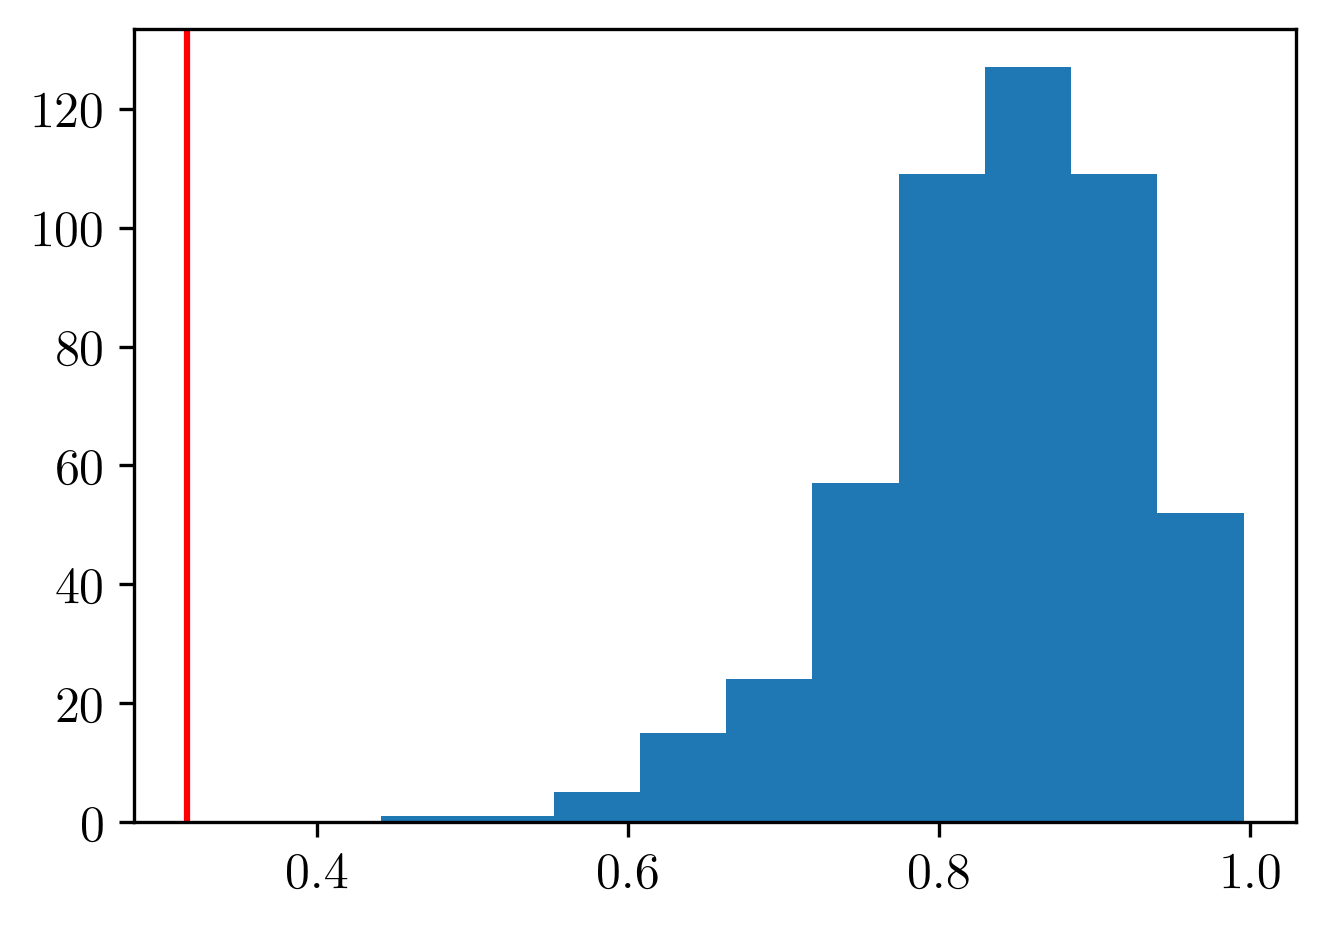

In [88]:
plt.hist(effectualnesses)
plt.axvline(sqrt(m_star), color="r")

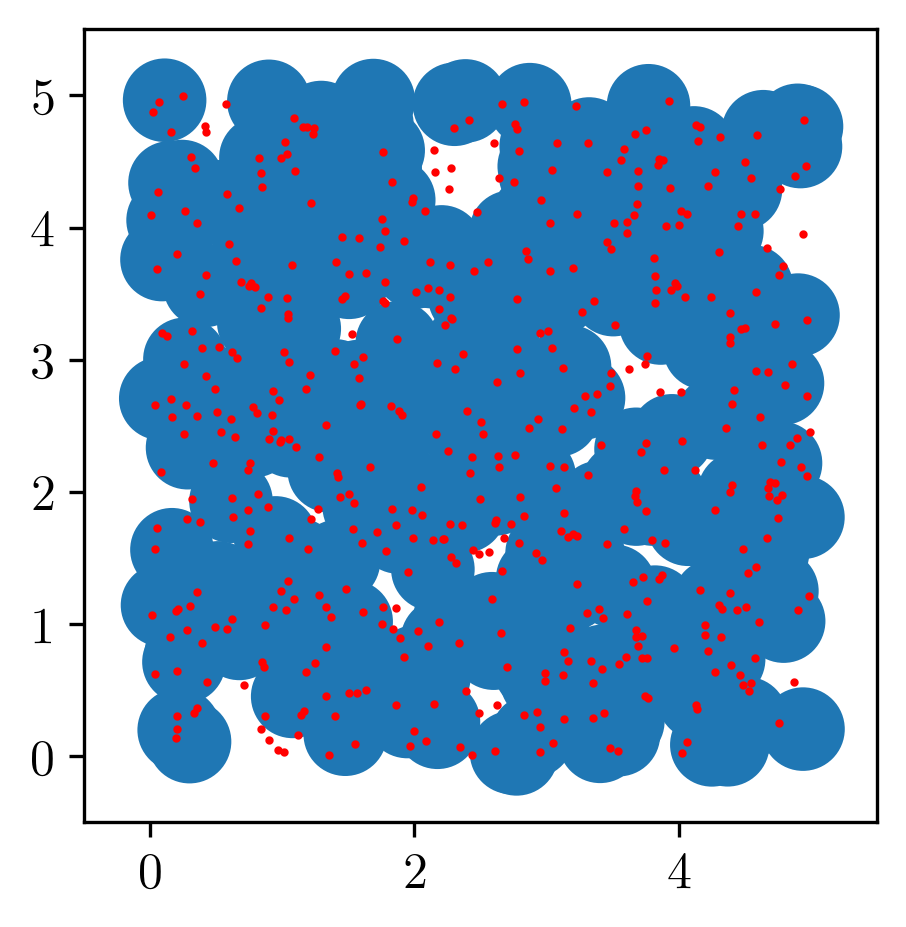

In [87]:
from matplotlib.collections import PatchCollection
# plt.scatter(*templates.T, s=1)

circles = []
for x, y in templates:
    circles.append(plt.Circle((x, y), radius=sqrt(m_star)))

circles = PatchCollection(circles, zorder=0)

plt.gca().add_collection(circles)

plt.scatter(*points.T, s=1, c="r")

plt.xlim(-0.5, 5.5)
plt.ylim(-0.5, 5.5)
plt.gca().set_aspect("equal")

In [21]:
n_templates

DeviceArray(9536., dtype=float64)

In [11]:
naive_vol / (2 / sqrt(2))**2

DeviceArray(5000., dtype=float64)

In [92]:
np.random.rand()

0.06123280915066731